<a href="https://colab.research.google.com/github/odesay97/MachineLearing_Class/blob/main/7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인공신경망

인공신경망에 대해 배우기 전에 , 이장에서 사용할 데이터세트에 대해 먼저 알아보자

MNIST : 딥러닝을 배울 때 사용하는 데이터셋

손으로 쓴 0~9까지의 숫자로 이루어짐

패션 MNIST는 숫자 대신 패션 아이템으로 이루어진 데이터

패션 MNIST는 매우 유명하기 떄문에 많은 딥러닝 라이브러리에서 이 데이터를 가져올 수 있는 도구를 제공

여기서는 텐서플로(tensorflow)를 사용해서 데이터를 불러옴

In [27]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

아래와 같이 텐서블로의 케라스는 데이터셋을 불러오자마다 분할해주는 기능을 제공함

In [28]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [29]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [30]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


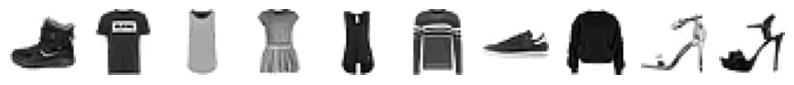

In [31]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

0=티셔츠, 1= 바지, 2= 스웨터, 3=드레스, 4=코트, 5=샌달, 6=셔츠, 7= 스니커즈, 8=가방, 9=앵클부츠

In [32]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


레이블당 샘플 개수 확인

In [33]:
import numpy as np

print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


각 클래스의 그림들을 하나씩 출력해보자

In [34]:
n_label = 10
labels =[99]*n_label
n=0
for i in range(train_target.shape[0]):
  if (labels[train_target[i]]==99):
    labels[train_target[i]] = i
    n=n+1
  if (n == n_label):
    break
print(labels)

[1, 16, 5, 3, 19, 8, 18, 6, 23, 0]


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


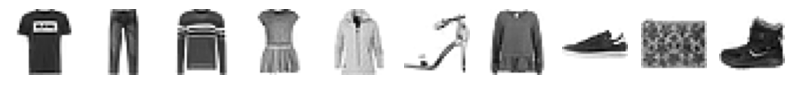

In [35]:
print([train_target[i] for i in labels])

fig, axs = plt.subplots(1,10,figsize=(10,10))
for i in range(10):
  axs[i].imshow(train_input[labels[i]], cmap='gray_r')
  axs[i].axis('off')
plt.show()

### 로지스틱 회귀를 이용한 분류

훈련 샘플이 많기 때문에 전체 데이터를 한번에 사용하는 것보다는 샘플을 하나씩 사용하는것이 더 효율적으로 보임

확률적 경사하강법 사용


확률적 경사 하강법은 여러 특성중 기울기가 가장 가파른 방향을 따라 이동

따라서 특성마다 값의 범위가 일정해야함

패션 MNIST의 경우 각 픽셀은 0~255 사이의 정수값을 가짐

이런 이미지의 경우 보통 255로 나누어 0~1 사이의 값으로 정규화

표준화는 아니지만 양수 값을로 이루어진 이미지를 전처리할 때 널리 사용하는 방법

###정규화와 표준화

--> 이전에 지도학습들에서 했던 StandardScaler작업들은 표준화에 해당함

####차이점

 정규화 ( Nomalization )

  * 값의 범위를 0~1 사이의 값으로 변환
  * scikit-learn에서 MinMaxScaler사용

  식

표준화 ( Standardization )

  * 값의 범위를 평균0, 분산 1 이 되도록 변환
  * 정규분포를 표준정규분포로 변환하는 것과 같음
  * scikit-learn에서 StandardScaler 사용함

  식

정규화

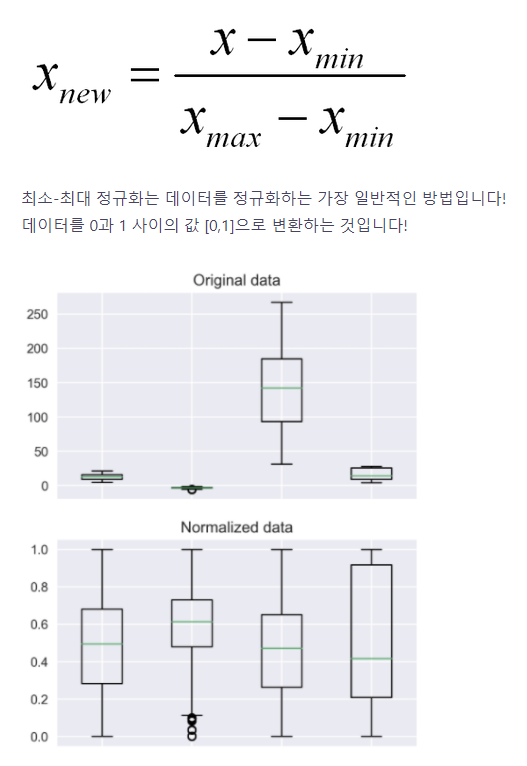

표준화

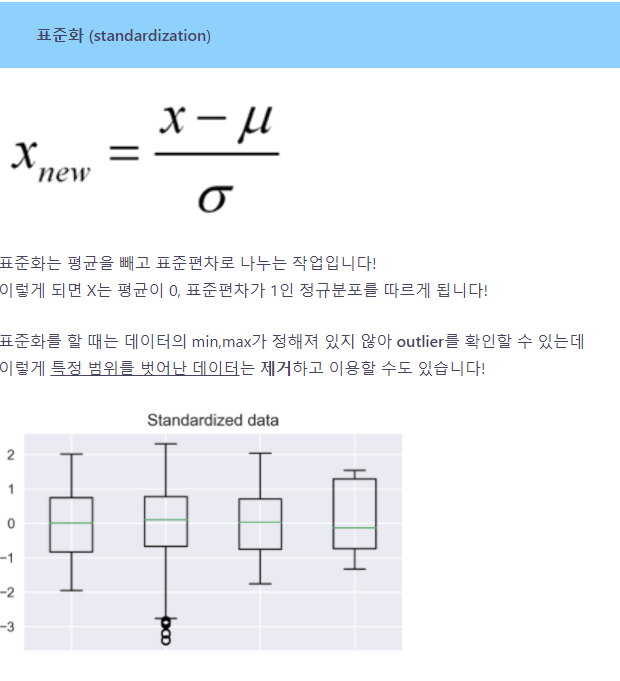

#### 공통점

  * 학습 전에 데이터를 scaling함

    * 머신러닝에서 스케일이 큰 특성의 영향력이 강해지는 것을 방지
    * 딥러닝에서 Local Minima에 빠질 위험을 감소하고 학습 속도 향상

    (Local Minima -> 경사하강법에서 지역 최소값, 국지 최소값 ( 전체에서의 최소값이 아닌 ) )

#### 최댓값 최소값 알때 정규화
최댓값과 최소값을 알고 있기 때문에 바로하면 됨

(데이터 - 최소값) / (최대값 - 최소값)

In [ ]:
# 최소값 0, 최대값 255

train_scaled = train_input / 255.0

train_scaled = train_scaled.reshape(-1, 28*28)
print(train_scaled.shape)

(60000, 784)


#### 최댓값 최소값 모를때 정규화
최댓값과 최소값을 모른다면 다음과 같이 MinMaxScaler를 사용하여 정규화할 수 있음

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_input.reshape(-1,28*28))

#print(scaler.data_max_)
#print(scaler.data_min_)

train_scaled1 = scaler.transform(train_input.reshape(-1,28*28))
test_scaled1 = scaler.transform(test_input.reshape(-1,28*28))
print(train_scaled1.shape)

(60000, 784)


### 로지스틱 회귀로 패션 아이템 분류하기

In [ ]:
# 최소값 0, 최대값 255
# 데이터 정규화

train_scaled = train_input / 255.0

train_scaled = train_scaled.reshape(-1, 28*28)
print(train_scaled.shape)

(60000, 784)


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=5, random_state=42)

scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8196000000000001


로지스틱 회귀 모델 공식

 * ci = x1w(1,i) + x2w(2,i) + ... + x784w(784,i) + bi

  * i: 클래스 수
  * c: 클래스
  * x: 픽셀
  * w: 가중치
  * b: 절편

* pi = softmax(ci)

  * pi : 데이터가 i번째 클래스일 확률

-----------

softmax : 다중분류에서 사용되는 여러개의 선형 방정식의 출력값을 0~1 사이로 압축하고 전체 합이 1 이 되도록 만드는 함수

이진 분류에서는 시그모이드 함수가 사용됨

---------

총  783 * 10 + 10 = (784 + 1) * 10 개의 모델 파라미터가 존재

 뒤에 +10 은 절편


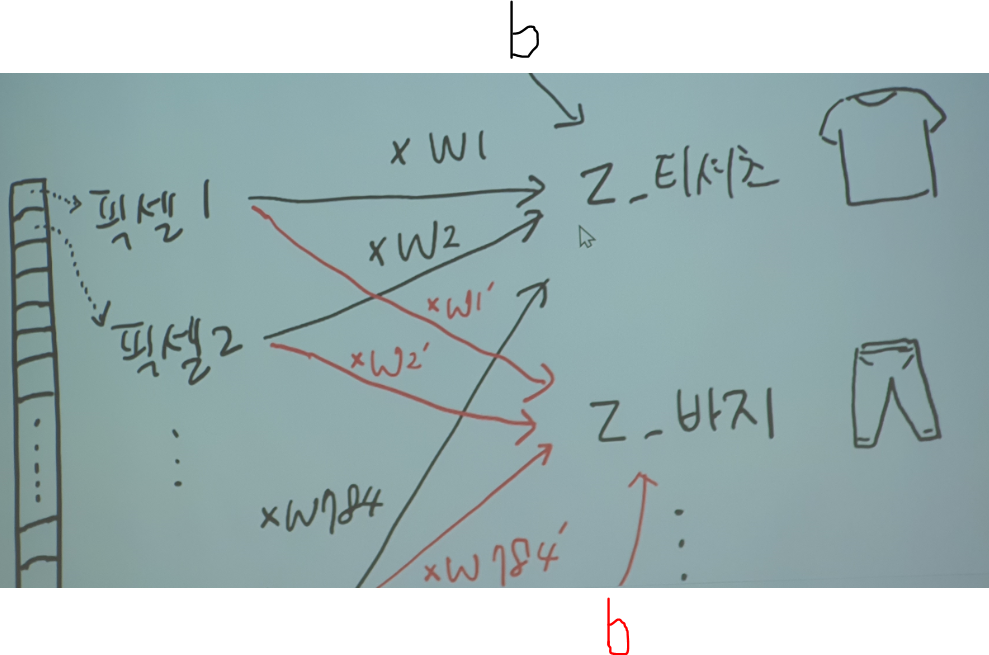

## 인공신경망

기본적인 인공신경망은 경사하강법과 비슷함

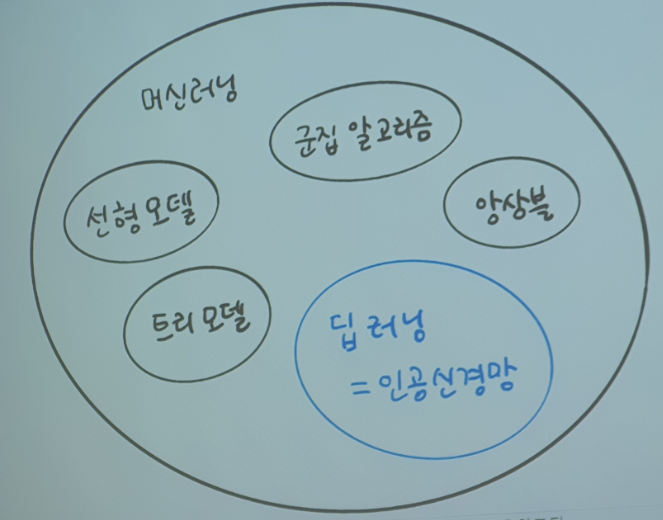

1차원 배열로 변경된 이미지의 784개의 픽셀은 각각 입력층에 입력으로 들어감. 추가연산은 없음

10개의 클래스가 있으므로, 중간 연산들을 통해 최종적으로 10개의 출력층으로 연산 결과값이 나옴

이러한 출력을 연산하는 다위를 뉴런(neuron)이라 하며 선형 연산이 전부임

여기서의 선형 연산은 확률적 경사 하강법 처럼 입력값에 대한 가중치와 절편 연산임

뉴런을 유닛(unit)이라 부르기도함

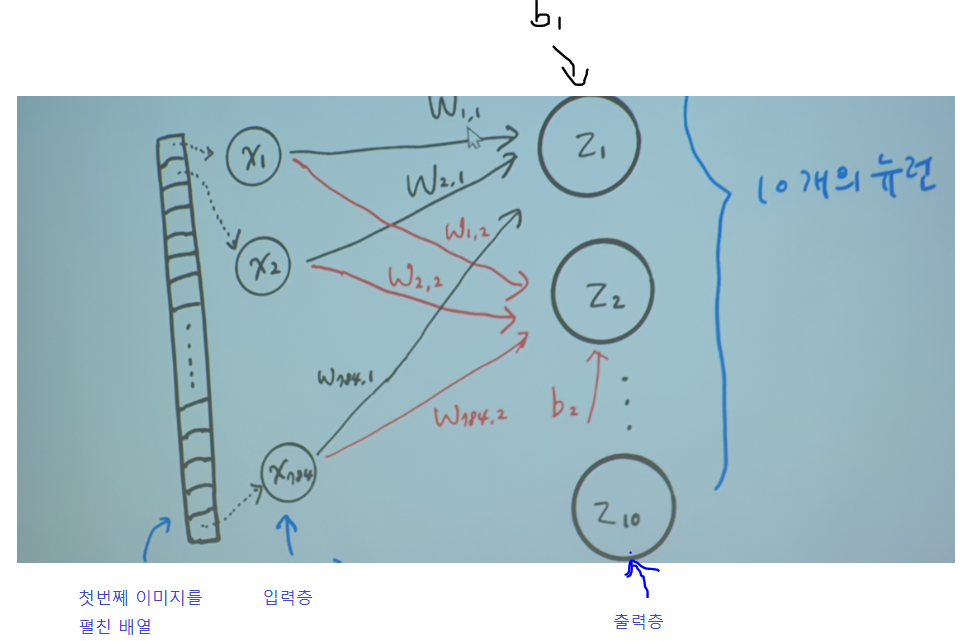

### 텐서플로 와 케라스

인기있는 딥러닝 라이브러리

딥러닝 라이브러리가 다른 머신러닝 라이브러리와 다른 점 중 하나는 그래픽 처리장치 GPU를 사용하는것

GPU는 벡터와 행렬연산에 매우 최적화되어 있기 떄문에 곱셈과 덧셈이 많이 수행되는 인공 신경망에 큰 도움이 됨

In [ ]:
import tensorflow as tf
from tensorflow import keras

## 인공신경망으로 모델만들기

로지스틱 회귀에서는 교차검증을 사용해 모델을 평가

인공 신경망에서는 교차검증을 잘 사용하지 않고 검증세트를 별도로 덜어내서 사용
1.  딥러닝 분야의 데이터셋은 충분히 크기 떄문에 검증점수가 안정적
2. 교차검증을 수행하기에는 훈련시간이 너무 오래 걸림

정규화는 앞에서 했으므로 넘어감

In [ ]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(38400, 784) (38400,)
(9600, 784) (9600,)


#### 출력층 생성
출력층이 10개 이므로 뉴런도 10개

#### 밀집층

784 개의 픽셀과 10개의 뉴런이 모두 연결된 선을 생각하면 7840개의 연결된 선이 존재하며 이는 매우 뺵빽하게 밀집되어 보임

따라서 밀집층이라 불림

이런 층을 양쪽의 뉴런이 모두 연결하므로 완전 연결층이라고도 부름

In [ ]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

keras.layers.Dense(뉴런개수, 뉴런의 출력에 적용할 함수, 입력의 크기)

  * 첫번쨰 매개변수인 뉴런개수는 10개의 클래스(패션 아이템)을 분류하므로 10을 지정
  * 두번쨰 매개변수는 활성홤수을 지정함
    * 뉴런의 선형방정식 계산 결과에 적용되는 함수
    * 지정하지 않으면 뉴런의 선형방정식 계산결과가 출력
    * 여기서는 뉴런의 출력에 적용할 함수로 다중분류이기 떄문에 소프트맥스 함수를 사용함
    * 소프트맥스 함수는 뉴런에서 출력되는 값을 확률로 바꾸기 위해 사용됨
    * 케라스층(케라스의 밀집층)에서는 activation 매개변수에 소프트맥스 함수를 지정함

    * 만약 2개의 클래스를 분류하는 이진 분류하면 시그모이드 함수를 사용하므로 activation = "sigmoid'를 지정함
    * 회귀모델인 경우에는 활성화 함수를 적용할 필요가 없음 ( 회귀 모델인 경우 분류와 다르게 계산한 결과값을 그대로 출력하기 때문에 필요없음 )

* 세번째 매개변수는 입력값의 크기 10개의 뉴런이 각각 몇개의 입력을 받는지 튜플로 지정
  * 784개의 원소로 이루어진 1차원 배열

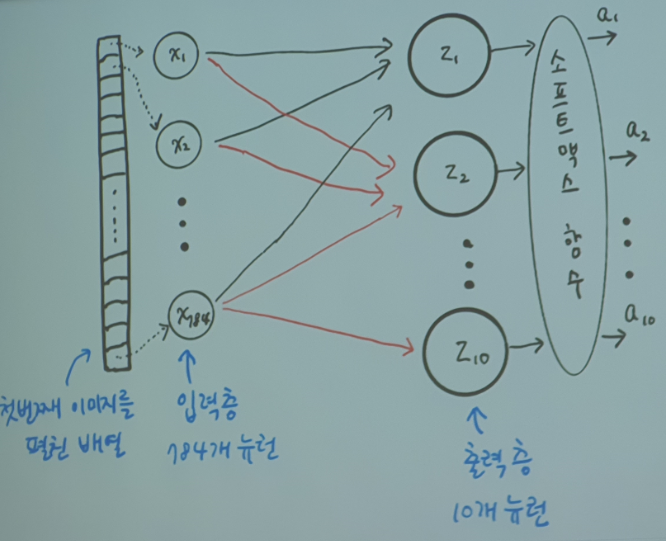

#### 밀집층을 가진 신경망 모델만들기
여기서는 출력층 하나만으로 구성됨

--> 즉 나중에는 여러개일수도 있음

In [ ]:
model = keras.Sequential(dense)

#### 케라스 모델 설정

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
print(train_target[:10])

[9 4 9 0 4 9 3 6 4 7]


#### 손실함수 선택기준

1. 이진분류? -> binary

2. 다중분류?
  1. 원핫이 되어있는경우 categorical

  2. 원핫이 안되어있고 정수일경우 sparse_categorical


#### 손실(loss)함수

손실함수가 무엇인지는 4-2에서 설명됨

* 이진분류 loss = 'binary_crossentropy'

 양성클래스에 대한 확률만 계산

* 다중분류 loss = 'categorical_crossentropy'
 다중 클래스에서는 모든 클래스에 대한 확률을 계산함

* sparse라는 단어는 왜 붙어있는가??

    클래스의 레이블이 정수이기 때문에 붙음
    
    이를 이해하기 위해서 어떻게 다중분류에서 확률이 계산되는지 알아야함








#### 이진분류 계산
  이진 크로스 엔트로피 손실을 위해 -log(예측확률)에 타깃값(정답)을 곱함

 a를 예측 확률이라 하면,

 타깃값이 1일때, -log(a) * 타깃값

 타깃값이 0일때, -log(1-a) * 타깃값

 이진분류의 출력뉴런은 오직 양성 클래스에 대한 확률 (a) 만 출력하기 때문에 음성클래스에 대한 확률은 간단히 1-a로 구할 수 있음

 이진분류의 타깃값은 양성 샘프일때 1 음성샘플일때 0으로 됨

 하나의 뉴런만으로도 양성과 음성클래스에 대한크로스 엔트로피 손실을 모두 계산할 수 있음

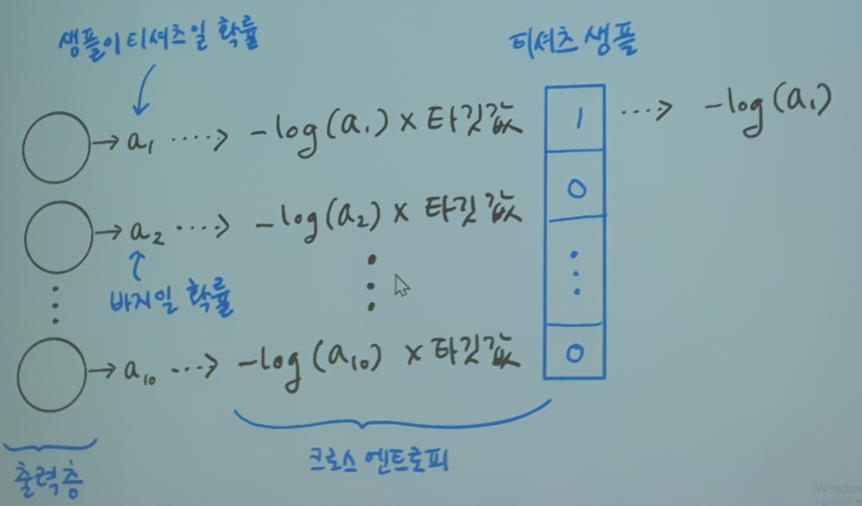

#### 다중분류 계산 ( 원핫 인코딩 )

출력층은 클래스 수 만큼의 뉴런이 있고 클래스 수만큼의 클래스에 대한 확률을 출력함

클래스 수 만큼의 확률이 모두 출력되기 때문에 타깃에 해당하는 확률만 남기기 위해 확률에 모두 0을 곱함

예를 들어 샘플이 티셔츠일 경우 첫번쨰 뉴런의 활성화 함수 출력인 a1에 클로스 엔트로피 손실함수를 적용하고

나머지 활성화 함수 출력 a2~a10까지는 모두 0으로 만듬

이렇게 하기 위해 티셔츠 샘플의 타깃값은 첫번째 원소만 1이고 나머지는 모두 0인 배열로 만들 수 있음

[1,0,0,0,0,0,0,0,0,0]

이 배열과 출력층의 활성화 값의 배열을 곱하면됨

[a1,a2,a3,a4,a5,a6,a7,a8,a9,a10] * [1,0,0,0,0,0,0,0,0,0]

결국 a1만 남고 나머지는 모두 0이 됨

[a1,0,0,0,0,0,0,0,0,0]

즉, 타깃에 해당하는 위치만 1이고 나머지는 0이 되는 배열을 만들어야함

이를 <b>원 핫 인코딩</b>이라함

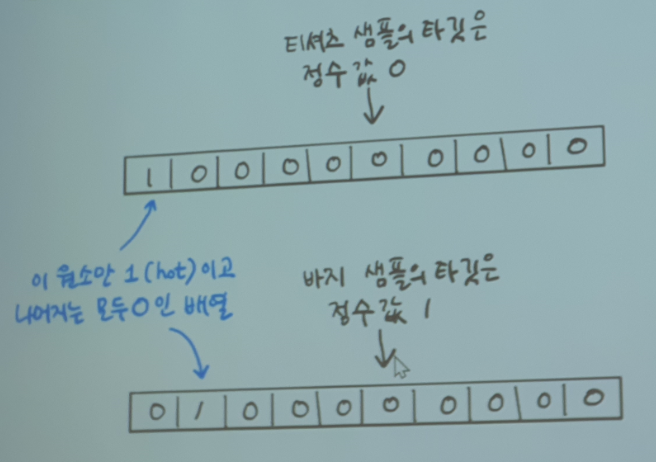

다중분류에서 크로스 엔트로피 손실함수를 사용하려면 0,1,2와 같이 정수로 된 타깃값을 원핫 인코딩으로 변환해야함

그러나 패션MNIST 데이터의 타깃값은 0~9 사이의 정수값으로 되어 있음

정수로된 타깃값을 사용해 크로스 앤트로피 손실을 계산하는 것이 바로 sparse_categorical_crossentropy임

만약 타깃값을 원핫 인코딩으로 변환해서 준비했다면 categorical_crossentropy를 사용하면됨

참고로 신경망에서 손실(loss)을 낮추려면 활성화 출력의 값(a)을 가능한 1에 가깝게 만들어야함
  * log(1) = 0


#### metrics

측정하려는 지표를 지정할 수 있음

케라스는 모델이 훈련할 때 기본적으로 에포크마다 손실값을 출력함

손실이 줄어드는 것을 보고 훈련이 잘 되었다는 것을 알수 있지만 정확도를 함께 출력하면 더 좋음

이를 위해 metrics매개변수에 정확도 지표를 의미하는 accuracy를 지정

In [ ]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1200/1200 [==============================] - 5s 3ms/step - loss: 0.6346 - accuracy: 0.7849
Epoch 2/5
1200/1200 [==============================] - 2s 2ms/step - loss: 0.4881 - accuracy: 0.8329
Epoch 3/5
1200/1200 [==============================] - 3s 3ms/step - loss: 0.4593 - accuracy: 0.8439
Epoch 4/5
1200/1200 [==============================] - 2s 2ms/step - loss: 0.4456 - accuracy: 0.8481
Epoch 5/5
1200/1200 [==============================] - 3s 3ms/step - loss: 0.4365 - accuracy: 0.8514


여기서 Epoch는 훈련 횟수이고 밑에 1500은 미니배치수

48000개의 샘플을 한번에 모두 사용하여 훈련하기에는 시간이 많이 걸리므로 ,32개로 나누어서 총 1500번 훈련을 수행

즉, 이 예제에서는 총 1500*5번의 모델 매개변수 수정이 발생함

모델의 학습속도를 높이고 계산량을 줄이면서도 전체 데이터셋에 대한 대표성을 유지할 수 있음

#### 모델 성능 평가

In [ ]:
model.evaluate(val_scaled, val_target)

300/300 [==============================] - 1s 2ms/step - loss: 0.4230 - accuracy: 0.8630


[0.42295512557029724, 0.8630208373069763]

# 사이킷런 - 케라스 모델생성과정 간략화

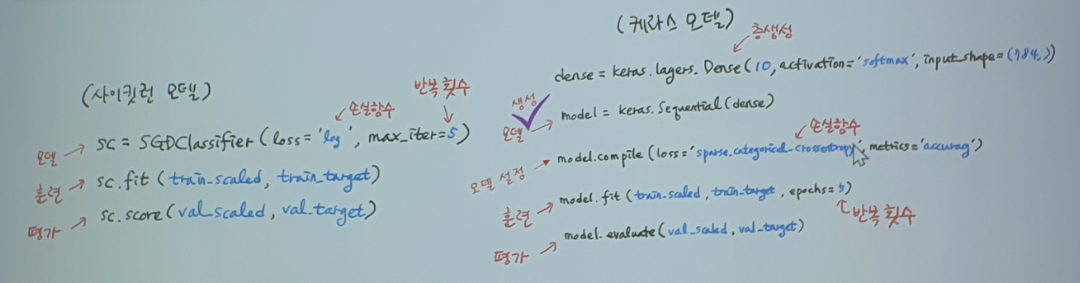